In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Cargar los datos desde el archivo CSV
data = pd.read_csv("Zernike.csv")

# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop("etiqueta", axis=1)  # Características
y = data["etiqueta"]  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
# Parámetros

learning_rate = 0.001  # Tasa de aprendizaje
momentum_descent = 0.5  # Momentum
hidden_layers = (150,100,50)  # Número de capas ocultas y número de neuronas en cada capa
tolerance = 1e-4  # Parámetro de tolerancia
solver_weight = 'adam'  # Parámetro para cálculo de pesos
validation = 0.1  # Porcentaje de particiones para validación (0.1 = 10%  => 10 folds)

# Crear el clasificador MLP
mlp_classifier = MLPClassifier(
                        # No se cambian
                        max_iter = 1000,
                        verbose=True,
                        activation = 'logistic',

                        # Si cambian
                        validation_fraction = validation,
                        hidden_layer_sizes = hidden_layers,
                        solver = solver_weight,
                        tol = tolerance,
                        learning_rate_init = learning_rate,
                        momentum = momentum_descent)

# Entrenar el clasificador
history = mlp_classifier.fit(X_train_scaled, y_train)

Iteration 1, loss = 1.34200484
Iteration 2, loss = 1.16817074
Iteration 3, loss = 1.16439156
Iteration 4, loss = 1.16066043
Iteration 5, loss = 1.15324651
Iteration 6, loss = 1.14245297
Iteration 7, loss = 1.13020495
Iteration 8, loss = 1.12162429
Iteration 9, loss = 1.11665444
Iteration 10, loss = 1.11542175
Iteration 11, loss = 1.11351359
Iteration 12, loss = 1.11323602
Iteration 13, loss = 1.11426479
Iteration 14, loss = 1.11226305
Iteration 15, loss = 1.11097654
Iteration 16, loss = 1.11039450
Iteration 17, loss = 1.11078823
Iteration 18, loss = 1.10976208
Iteration 19, loss = 1.11035277
Iteration 20, loss = 1.10887048
Iteration 21, loss = 1.10885543
Iteration 22, loss = 1.10803652
Iteration 23, loss = 1.10842802
Iteration 24, loss = 1.10972652
Iteration 25, loss = 1.10750923
Iteration 26, loss = 1.10705023
Iteration 27, loss = 1.10662454
Iteration 28, loss = 1.10674712
Iteration 29, loss = 1.10912520
Iteration 30, loss = 1.10796959
Iteration 31, loss = 1.10648611
Iteration 32, los

In [134]:
# Evaluar el modelo
train_accuracy = mlp_classifier.score(X_train_scaled, y_train)
test_accuracy = mlp_classifier.score(X_test_scaled, y_test)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

Precisión en el conjunto de entrenamiento: 0.774609375
Precisión en el conjunto de prueba: 0.446875


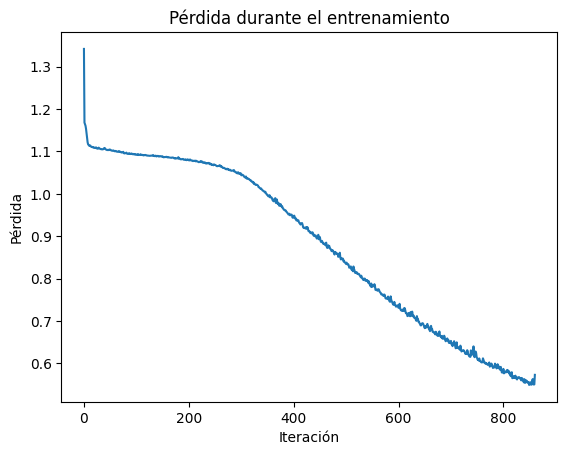

In [135]:
# Obtener la pérdida de cada iteración
loss_curve = mlp_classifier.loss_curve_

# Graficar la pérdida de cada iteración
plt.plot(loss_curve)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()

In [136]:
y_pred = mlp_classifier.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.45


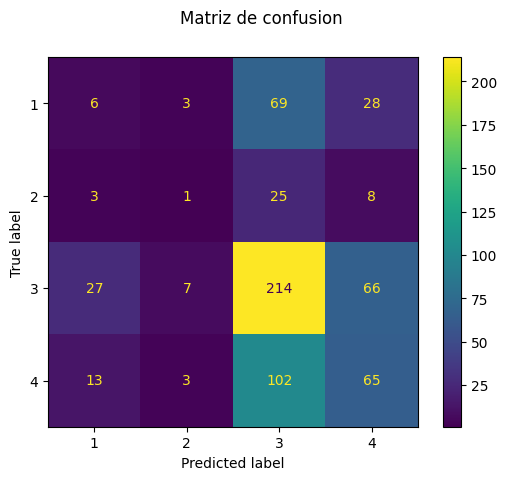

In [141]:
fig = ConfusionMatrixDisplay.from_estimator(mlp_classifier, X_test_scaled, y_test, display_labels=mlp_classifier.classes_)
fig.figure_.suptitle("Matriz de confusion")
plt.show()

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.12      0.06      0.08       106
           2       0.07      0.03      0.04        37
           3       0.52      0.68      0.59       314
           4       0.39      0.36      0.37       183

    accuracy                           0.45       640
   macro avg       0.28      0.28      0.27       640
weighted avg       0.39      0.45      0.41       640

